In [1]:
graph = {
    'A' : ['B','C'],
    'B' : ['D', 'E'],
    'C' : ['F'],
    'D' : [],
    'E' : ['F'],
    'F' : []
}

visited = set()
def dfs(visited, graph, node):
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)


dfs(visited, graph, 'A')

A
B
D
E
F
C


In [3]:
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = set()

def dfs(visited, graph, node):
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)


print("Following is the Depth-First Search")
dfs(visited, graph, '5')

Following is the Depth-First Search
5
3
2
4
8
7


In [4]:
from collections import defaultdict

n = int(input("Enter No of Nodes:"))
e = int(input("Enter No of Edge:"))

graph = defaultdict(list)

for i in range(e):
    i,j = map(int,input().split())
    graph[i].append(j)

def dfs(v,goal,limit):
    if v == goal:
        return 1;

    for i in graph[v]:
        if limit-1 >= 0:
            if dfs(i,goal,limit-1) !=  -1:
                return 1
    return -1


goal = int(input("Enter Goal:"))
limit = int(input("Enter Limit:"))

res = dfs(0,goal,limit)
if res == -1:
    print("not found")
else:
    print("found within depth limit")

Enter No of Nodes:6
Enter No of Edge:7
0 1
0 2
1 2
1 3
2 5 
2 6
2 7
Enter Goal:6 
Enter Limit:3
found within depth limit


Path: A -> C -> G -> K -> L


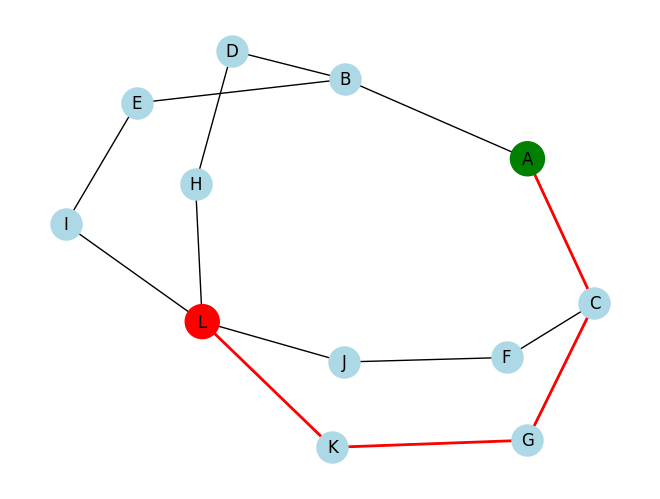

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue

def best_first_search(G, start, goal):
    frontier = PriorityQueue()
    frontier.put((0, start, [start]))
    while not frontier.empty():
        _, node, path = frontier.get()
        if node == goal:
            return path
        for neighbor in G[node]:
            if neighbor not in path:
                new_path = path + [neighbor]
                priority = abs(ord(neighbor) - ord(goal))
                frontier.put((priority, neighbor, new_path))
    return None

G = nx.Graph([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'),
              ('C', 'G'), ('D', 'H'), ('E', 'I'), ('F', 'J'), ('G', 'K'),
              ('H', 'L'), ('I', 'L'), ('J', 'L'), ('K', 'L')])

path = best_first_search(G, 'A', 'L')
print("Path:", ' -> '.join(path) if path else "No path found")

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
if path:
    nx.draw_networkx_edges(G, pos, edgelist=list(zip(path, path[1:])), edge_color='r', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=[path[0], path[-1]], node_color=['g', 'r'], node_size=600)
plt.show()

In [6]:
Graph_nodes = {
    'A': [('B', 6), ('F', 3)],
    'B': [('C', 3), ('D', 2)],
    'C': [('D', 1), ('E', 5)],
    'D': [('C', 1), ('E', 8)],
    'E': [('I', 5), ('J', 5)],
    'F': [('G', 1), ('H', 7)],
    'G': [('I', 3)],
    'H': [('I', 2)],
    'I': [('E', 5), ('J', 3)],

}


def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None


def h(n):
    H_dist = {
        'A': 10,
        'B': 8,
        'C': 5,
        'D': 7,
        'E': 3,
        'F': 6,
        'G': 5,
        'H': 3,
        'I': 1,
        'J': 0
    }
    return H_dist[n]


def aStarAlgo(start_node, stop_node):
    open_set = set(start_node)
    closed_set = set()
    g = {}
    parents = {}
    g[start_node] = 0
    parents[start_node] = start_node

    while len(open_set) > 0:
        n = None

        for v in open_set:
            if n == None or g[v] + h(v) < g[n] + h(n):
                n = v

        if n == stop_node or Graph_nodes[n] == None:
            pass
        else:
            for (m, weight) in get_neighbors(n):
                if m not in open_set and m not in closed_set:
                    open_set.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n
                        if m in closed_set:
                            closed_set.remove(m)
                            open_set.add(m)

        if n == None:
            print('Path does not exist!')
            return None
        if n == stop_node:
            path = []

            while parents[n] != n:
                path.append(n)
                n = parents[n]

            path.append(start_node)

            path.reverse()

            print('Path found: {}'.format(path))
            return path
        open_set.remove(n)
        closed_set.add(n)

    print('Path does not exist!')
    return None


aStarAlgo('A', 'J')

Path found: ['A', 'F', 'G', 'I', 'J']


['A', 'F', 'G', 'I', 'J']